# EDA : House Price in Ames
### 1) 도메인 지식 및 Random Forest 기법을 활용한 Feature Vector 찾기 
### 2) NaN값 및 Outlier 처리의 Feature Engineering 
### 3) 모델링  

In [1]:
sns.set()
%matplotlib inline

In [2]:
# EDA 용 데어터 셋
hp_train = pd.read_csv('./train.csv')
hp_test = pd.read_csv('./test.csv')

In [3]:
# feature engineering 용 데이터 셋 
hp_train2 = pd.read_csv('./train.csv')
hp_test2 = pd.read_csv('./test.csv')

### 1) 도메인 지식 및 Random Forest 기법을 활용한 Feature Vector 찾기 
* 1-1) 부동산 가격에 영향을 미치는 요소 확인 [real estate](http://www.zevizoproperties.com/blog/property-selling/11-essential-factors-that-affect-property-value/)
* 1-2) Random Forest를 활용한 중요 feature 찾기 

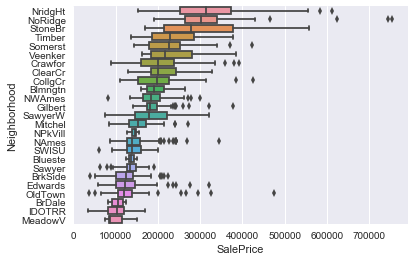

In [4]:
# 1-1-1) Neighborhood
# 집값에 가장 큰 영향을 주는 요소 중 하나인 'Location' 에 해당하는 Neighborhood 칼럼을 
# median 값 순으로 나열하여 선형성과 상관관계를 확인한다. (0.71)
order = hp_train.groupby(['Neighborhood'])['SalePrice'].median().sort_values(ascending=False)
sns.boxplot(hp_train.SalePrice, hp_train.Neighborhood, order=order.index)

In [5]:
def order_Neighbor(x):
    '''the most high median price of Neighborhood level sets 24, the lowest 0'''
    if x == 'NridgHt':
        return 24
    elif x == 'NoRidge':
        return 23
    elif x == 'StoneBr':
        return 22
    elif x == 'Timber':
        return 21
    elif x == 'Somerst':
        return 20
    elif x == 'Veenker':
        return 19
    elif x == 'Crawfor':
        return 18
    elif x == 'ClearCr':
        return 17
    elif x == 'CollgCr':
        return 16
    elif x == 'Blmngtn':
        return 15
    elif x == 'NWAmes':
        return 14
    elif x == 'Gilbert':
        return 13
    elif x == 'SawyerW':
        return 12
    elif x == 'Mitchel':
        return 11
    elif x == 'NPkVill':
        return 10
    elif x == 'NAmes':
        return 9
    elif x == 'SWISU':
        return 8
    elif x == 'Blueste':
        return 7
    elif x == 'Sawyer':
        return 6
    elif x == 'BrkSide':
        return 5
    elif x == 'Edwards':
        return 4
    elif x == 'OldTown':
        return 3
    elif x == 'BrDale':
        return 2
    elif x == 'IDOTRR':
        return 1
    elif x == 'MeadowV':
        return 0
    
    
hp_train['Ordered_Num_Neighborhood'] = hp_train['Neighborhood'].apply(order_Neighbor)

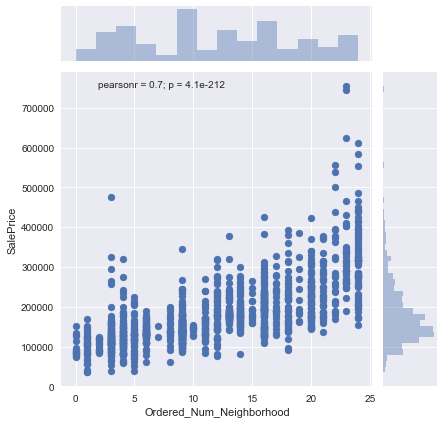

In [6]:
sns.jointplot(x='Ordered_Num_Neighborhood', y='SalePrice', data=hp_train)

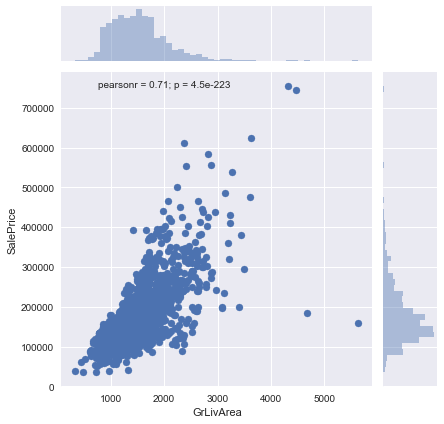

In [7]:
sns.jointplot(x='GrLivArea', y='SalePrice', data=hp_train)

In [8]:
# 1-1-2) TotalFlrSF
# 집값에 가장 큰 영향을 주는 요소 중 하나인 'Size' 를 확인하기 위해  
# 1stFlrSF 와 2ndFlrSF 를 결합한 TotalFlrSF 칼럼을 새로 만든후 선형성과 상관관계를 확인한다. (0.72)
hp_train['TotalFlrSF'] = hp_train['1stFlrSF'] + hp_train['2ndFlrSF']

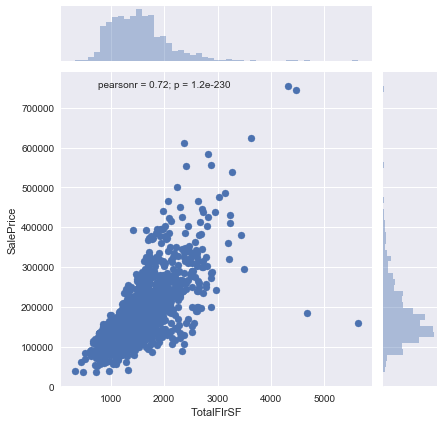

In [9]:
sns.jointplot(x='TotalFlrSF', y='SalePrice', data=hp_train)

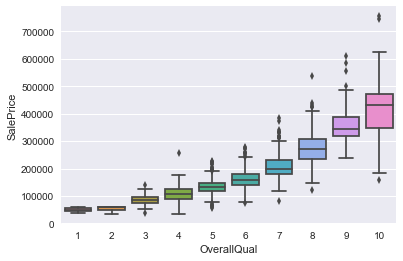

In [10]:
# 1-1-3) Condition 
# 집값에 가장 큰 영향을 주는 요소 중 하나인 'Condition' 을 확인하기 위해  
# OveralQual의 선형성과 상관관계를 확인한다. (0.79)
sns.boxplot(x='OverallQual', y='SalePrice',data=hp_train)

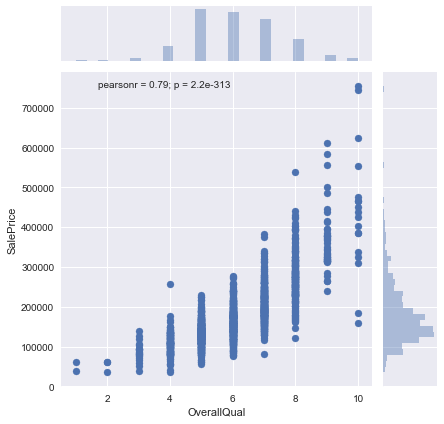

In [11]:
sns.jointplot(x='OverallQual', y='SalePrice', data=hp_train)

* 1-2) Random Forest를 활용한 중요 feature 찾기 

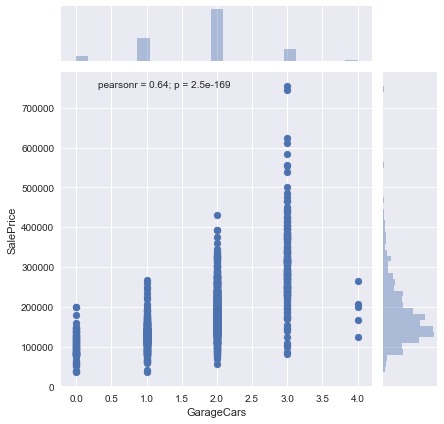

In [12]:
#1-2-1) 'GarageCars'
# Random Forest 결과로 중요 feature 상위에 랭크된 GarageCars의 선형성과 상관관계를 확인한다. (0.64)
sns.jointplot(x='GarageCars', y='SalePrice', data=hp_train)

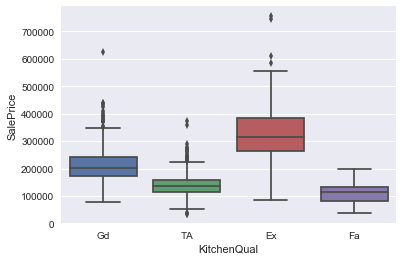

In [13]:
#1-2-2) 'KitchenQual'
# Random Forest 결과로 중요 feature 상위에 랭크된 KitchenQual 선형성과 상관관계를 확인한다. (0.66)
sns.boxplot(x='KitchenQual', y='SalePrice', data=hp_train)

In [14]:
def fkq(col):
    if col == 'Ex':
        return 4
    elif col == 'Gd':
        return 3
    elif col == 'TA':
        return 2
    elif col == 'Fa':
        return 1
    elif col == 'Po':
        return 0

hp_train['Num_KitchenQual'] = hp_train['KitchenQual'].apply(fkq)

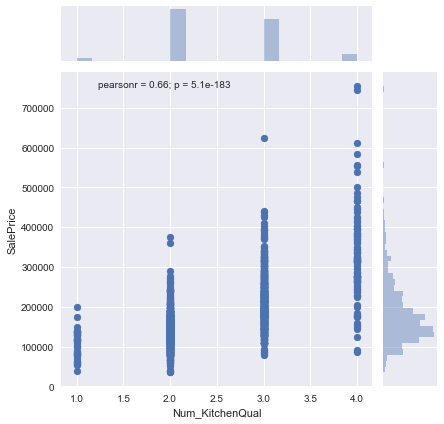

In [15]:
sns.jointplot(x='Num_KitchenQual', y='SalePrice', data=hp_train)

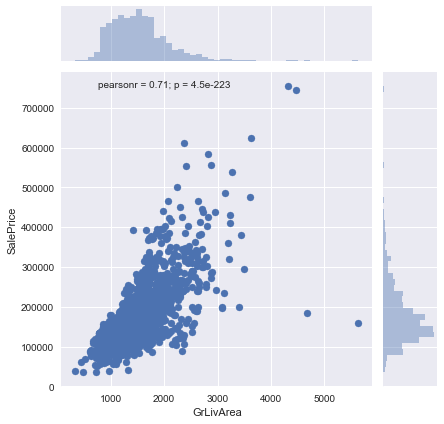

In [16]:
#1-2-3) 'GrLivArea'
# Random Forest 결과로 중요 feature 상위에 랭크된 GrLivArea 선형성과 상관관계를 확인한다. (0.71)
sns.jointplot(x='GrLivArea', y='SalePrice', data=hp_train)

### 2) Feature Engineering
* NaN 값은 mode 또는 median 으로 대체해준다. 
* 카테고리칼럼은 숫자칼럼으로 바꿔준다. 
* outlier 가 속한 row는 삭제해준다 (to do)

#### * train 과  test 를 일시적으로 합쳐, 동일하게 engineering 작업을 해준다 

In [17]:
# SalePrice 칼럼을 따로 저장한 후 train 에서 삭제한다. 
data = hp_train2['SalePrice']
hp_train2.drop('SalePrice', axis=1, inplace=True);

In [18]:
# train 과 test 를 합친 후, 동일하게 feature engineering 을 해준다. 
hp_all = pd.concat([hp_train2, hp_test2], axis=0)
hp_all.shape

(2919, 80)

In [19]:
# TotalFlrSF 칼럼을 새로 만들어준후, 
# 이를 포함한 총 6개의 칼럼을 최종 feature로 선택한다. 
hp_all['TotalFlrSF'] = hp_all['1stFlrSF'] + hp_all['2ndFlrSF']
fs_hp = hp_all[['OverallQual', 'TotalFlrSF', 'GrLivArea', 'Neighborhood', 'KitchenQual', 'GarageCars']]

In [20]:
# Missing value 의 존재를 확인한다. 
fs_hp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 6 columns):
OverallQual     2919 non-null int64
TotalFlrSF      2919 non-null int64
GrLivArea       2919 non-null int64
Neighborhood    2919 non-null object
KitchenQual     2918 non-null object
GarageCars      2918 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 159.6+ KB


In [21]:
fs_hp[fs_hp.isnull().any(axis=1)]

,OverallQual,TotalFlrSF,GrLivArea,Neighborhood,KitchenQual,GarageCars
95,5,1224,1224,ClearCr,NaN,1.0
1116,5,1828,1828,IDOTRR,Gd,NaN


In [22]:
# KitchenQual 칼럼의 최빈값을 확인한 후, NaN 대신에 넣어준다. 
fs_hp['KitchenQual'].value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [23]:
fs_hp['KitchenQual'] = fs_hp.KitchenQual.fillna('TA')

C:\Users\ssoda\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
# GarageCars 의 NaN 값에는 median 값을 대신 넣어준다. 
fs_hp['GarageCars'] = fs_hp.GarageCars.fillna(fs_hp.GarageCars.median())

C:\Users\ssoda\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [25]:
# Missing values 가 잘 처리 되었음을 확인한다. 
fs_hp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 6 columns):
OverallQual     2919 non-null int64
TotalFlrSF      2919 non-null int64
GrLivArea       2919 non-null int64
Neighborhood    2919 non-null object
KitchenQual     2919 non-null object
GarageCars      2919 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 159.6+ KB


In [26]:
# Neighborhood 칼럼을, SalePrice 와의 그래프 상에서 median값이 가장 큰 순으로 숫자값을 넣어준다. 
def order_Neighbor(x):
    '''the most high median price of Neighborhood level sets 24, the lowest 0'''
    if x == 'NridgHt':
        return 24
    elif x == 'NoRidge':
        return 23
    elif x == 'StoneBr':
        return 22
    elif x == 'Timber':
        return 21
    elif x == 'Somerst':
        return 20
    elif x == 'Veenker':
        return 19
    elif x == 'Crawfor':
        return 18
    elif x == 'ClearCr':
        return 17
    elif x == 'CollgCr':
        return 16
    elif x == 'Blmngtn':
        return 15
    elif x == 'NWAmes':
        return 14
    elif x == 'Gilbert':
        return 13
    elif x == 'SawyerW':
        return 12
    elif x == 'Mitchel':
        return 11
    elif x == 'NPkVill':
        return 10
    elif x == 'NAmes':
        return 9
    elif x == 'SWISU':
        return 8
    elif x == 'Blueste':
        return 7
    elif x == 'Sawyer':
        return 6
    elif x == 'BrkSide':
        return 5
    elif x == 'Edwards':
        return 4
    elif x == 'OldTown':
        return 3
    elif x == 'BrDale':
        return 2
    elif x == 'IDOTRR':
        return 1
    elif x == 'MeadowV':
        return 0
    
    
fs_hp['Ordered_Num_Neighborhood'] = fs_hp['Neighborhood'].apply(order_Neighbor)

C:\Users\ssoda\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [27]:
# 카테고리 칼럼은 삭제해준다.
fs_hp.drop('Neighborhood', axis=1, inplace=True)

C:\Users\ssoda\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [28]:
# KitchenQual 칼럼의 카테고리값을 숫자로 바꿔준다.
def fkq(col):
    if col == 'Ex':
        return 4
    elif col == 'Gd':
        return 3
    elif col == 'TA':
        return 2
    elif col == 'Fa':
        return 1
    elif col == 'Po':
        return 0

fs_hp['Num_KitchenQual'] = fs_hp['KitchenQual'].apply(fkq)

C:\Users\ssoda\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [29]:
# 기존의 카테고리칼럼을 삭제한다.
fs_hp.drop('KitchenQual', axis=1, inplace=True)

C:\Users\ssoda\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [30]:
# Missing values 와 카테고리값전환 작업이 잘 되었음을 확인한다. 
fs_hp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 6 columns):
OverallQual                 2919 non-null int64
TotalFlrSF                  2919 non-null int64
GrLivArea                   2919 non-null int64
GarageCars                  2919 non-null float64
Ordered_Num_Neighborhood    2919 non-null int64
Num_KitchenQual             2919 non-null int64
dtypes: float64(1), int64(5)
memory usage: 159.6 KB


In [31]:
# 아웃라이어 처리 (to do)

### 3) 모델링  
* scikit-learn의 Regression 모델을 사용하여 예측치를 구한다.
* 의사역행렬를 사용하여 직접구한 가중치를 사용하여 예측치를 구한다.
* 최적화 작업을 수행한다 (to do)

In [32]:
# feature engineering이 끝난 train과 test를 다시 나눠주어,
# 모델적합을 수행한다.
df_train = fs_hp.iloc[:1460, :]
df_test = fs_hp.iloc[1460:, :]

In [33]:
X = df_train.values
y = data.values

In [34]:
X1 = df_train.values
y1 = data.values

In [35]:
# 1) scikit learn을 사용한 모델적합
from sklearn import linear_model

In [36]:
reg = linear_model.LinearRegression()

In [37]:
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
sol = reg.predict(df_test)

In [41]:
reg.score(X,y)

0.78510800070910958

In [40]:
# 2) 의사역행렬을 사용한 모델적합
w = np.dot(np.dot(np.linalg.inv(np.dot(X1.T, X1)), X1.T), y1)
sol2 = np.dot(df_test, w)
sol2.shape

(1459,)

In [41]:
# regression 모델 결과와 의사역행령 모델 결과를 각각 만들어 Kaggle에 제출한다.
df_test2 = df_test
# regression 모델 결과 
df_test['SalePrice'] = sol
df_test['Id'] = hp_test.Id
df_test[['Id','SalePrice']].to_csv('AmesGo.csv', index=False)
# 의사역행렬 모델 결과 
df_test2['SalePrice'] = sol2
df_test2['Id'] = hp_test.Id
df_test2[['Id','SalePrice']].to_csv('AmesGo_pseudo.csv', index=False)

C:\Users\ssoda\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\ssoda\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\ssoda\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

In [ ]:
# 결과 : 의사행렬을 직접구해 모델적합한 결과(0.20706) 가 Regression 모델 사용한 것보다 잘나옴 (0.20905)

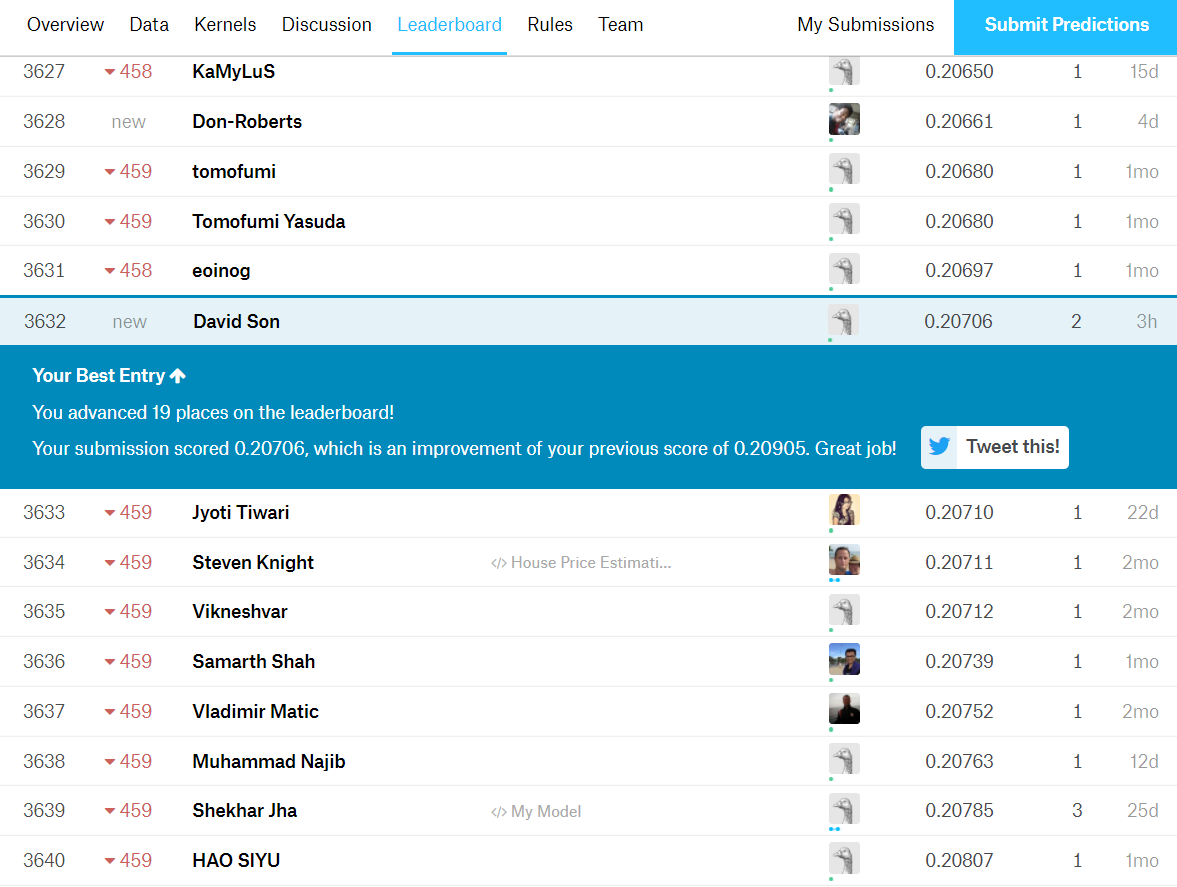

In [44]:
from IPython.display import Image
Image('./kaggle_ranking.png')